In [4]:
import pickle
import os
import pandas as pd
from tqdm import tqdm
from os import listdir
from os.path import join, exists
from extract import *

# input
train_docs = join('data', 'essays', 'train', 'tokenized')
dev_docs = join('data', 'essays', 'dev', 'tokenized')
train_labels = join('data', 'labels', 'train', 'labels.train.csv')
dev_labels = join('data', 'labels', 'dev', 'labels.dev.csv')

# output
train_csv_name = 'train_features.csv'
dev_csv_name = 'dev_features.csv'

# define features
ORIG = 'original'
CORR = 'corrected'
FUNC_WDS = 'function_words'
ERRORS = 'spelling_errors'
PHONES = 'phonemes'
POS = 'parts_of_speech'
PUNC = 'punctuation'
PUNC_2GRAM = 'punctuation_bigrams'
PUNC_3GRAM = 'punctuation_trigrams'

# types of analyzers
CHAR_WB = 'char_wb'
CHAR = 'char'

extract_dict = {
    ERRORS: extract_errors,
    FUNC_WDS: extract_function_words,
    PUNC: extract_punctuation,
    PUNC_2GRAM: extract_punc_bigrams,
    PUNC_3GRAM: extract_punc_trigrams,
}


def _load_pos_docs(dir_name):
    print(dir_name)
    
    docs = []
    ids = []
    for fn in tqdm(listdir(dir_name)):
        if '.pkl' in fn:
            ids.append(fn[:5])
            
            with open(join(dir_name, fn), 'rb') as f:
                doc = pickle.load(f)
                pos_list = []
                for sent in doc:
                    if sent:
                        words, pos = zip(*sent)
                        pos_list.extend(pos)
                docs.append(' '.join(pos_list))
            
    docs = pd.Series(docs, ids)
    docs.sort_index(inplace=True)
    return docs


def _load_docs(dir_name):
    print(dir_name)
    
    docs = []
    ids = []
    for fn in tqdm(listdir(dir_name)):
        if '.txt' in fn:
            ids.append(fn.split('.')[0])
            with open(join(dir_name, fn)) as f:
                docs.append(f.read())
        
    docs = pd.Series(docs, ids)
    docs.sort_index(inplace=True)
    return docs
    
    
def load_docs(orig_dir, out_name, remove=False):
    out_path = join(orig_dir, out_name)
    
    if remove and exists(out_path):
        os.remove(out_path)
        
    corrected_docs = join(orig_dir, 'corrected_out')
    phoneme_docs = join(orig_dir, 'corrected_out', 'phoneme_out')
    pos_docs = join(orig_dir, 'POS')
    
    if exists(out_path):
        return pd.read_csv(out_path, encoding='utf-8', low_memory=False, index_col=0)
    else:
        data = pd.DataFrame({ORIG: _load_docs(orig_dir), 
                             CORR: _load_docs(corrected_docs), 
                             PHONES: _load_docs(phoneme_docs).str.replace('__IGNORE__', ''),
                             POS: _load_pos_docs(pos_docs),
                            })
        
        for feature, func in tqdm(extract_dict.items()):
            data[feature] = data.apply(func, axis=1)
        
        data.to_csv(out_path, encoding='utf-8')
        return data
    
    
train_data = load_docs(train_docs, train_csv_name)
dev_data = load_docs(dev_docs, dev_csv_name)

data\essays\train\tokenized


100%|██████████████████████████████| 11005/11005 [01:14<00:00, 148.34it/s]


data\essays\train\tokenized\corrected_out


100%|██████████████████████████████| 11001/11001 [01:11<00:00, 154.59it/s]


data\essays\train\tokenized\corrected_out\phoneme_out


100%|██████████████████████████████| 11000/11000 [01:09<00:00, 158.77it/s]


data\essays\train\tokenized\POS


100%|███████████████████████████████████████| 5/5 [00:11<00:00,  2.47s/it]


data\essays\dev\tokenized


100%|████████████████████████████████| 1103/1103 [00:08<00:00, 124.90it/s]


data\essays\dev\tokenized\corrected_out


100%|████████████████████████████████| 1101/1101 [00:07<00:00, 139.66it/s]


data\essays\dev\tokenized\corrected_out\phoneme_out


100%|████████████████████████████████| 1100/1100 [00:08<00:00, 126.11it/s]


data\essays\dev\tokenized\POS


100%|███████████████████████████████████████| 5/5 [00:01<00:00,  3.62it/s]


In [65]:
train_data

,corrected,original,parts_of_speech,phonemes,function_words,punctuation_trigrams,punctuation,spelling_errors,punctuation_bigrams,lemmas
00001,Knowledge helps an individual in making his ca...,Knowledge helps an inidvidual in making his ca...,NNP VBZ DT JJ IN VBG PRP$ NN CC VBZ PRP VBG PR...,n aa1 l ah0 jh hh eh1 l p s ae1 n ih2 n d ah0 ...,an in his and him his that its to in having of...,livelihood_._I ''_._Even helpful_._Studying fe...,". . . . . . , . . , . . ' . . , . . , , . . . ...",ERR_INVERSION ERR_INVERSION ERR_INVERSION ERR_...,livelihood_. ._I ''_. ._Even helpful_. ._Study...,Knowledge help an individual in making his car...
00003,Traveling around the world and discovering new...,Traveling around the world and discovering new...,VBG IN DT NN CC VBG JJ NNS PRP RB VBN RB VBZ D...,t r ae1 v ah0 l ih0 ng er0 aw1 n d dh ah0 w er...,around the and you never before is the most to...,"people_._For resones_._First First_,_when visi...",". . , . , . , , . . , . , . . , . . , . , . ,",ERR_DELETION_d ERR_DELETION_e ERR_REPLACEMENT_...,"people_. ._For resones_. ._First First_, ,_whe...",Traveling around the world and discovering new...
00005,In my opinion the best way to travel is in a g...,In my opinion the best way to travel is in a g...,IN PRP$ NN DT JJS NN TO NN VBZ IN DT NN VBN IN...,ih0 n m ay1 ah0 p ih1 n y ah0 n dh ah0 b eh1 s...,my the to is in a by a other would be to or in...,guide_._The guide_._The are_:_1. efficiently_....,". . : . . . . , , . , . . , . , , . . . . . , ...",,guide_. ._The guide_. ._The are_: :_1. efficie...,In my opinion the best way to travel is in a g...
00006,I disagree that in twenty years there will be ...,I disagree that in twenty years there will be ...,PRP VBP IN IN CD NNS RB MD VB JJR NNS IN NN IN...,ay1 d ih0 s ah0 g r iy1 dh ae1 t ih0 n t w eh1...,that in twenty there will be fewer in than the...,today_._Why car_?_Because useful_._It schedule...,". ? . , , . , . , , . . , , , , , . , , . , . ...",ERR_DELETION_h ERR_INSERTION_e ERR_REPLACEMENT...,today_. ._Why car_? ?_Because useful_. ._It sc...,I disagree that in twenty year there will be f...
00007,I strongly agree that successful people try ne...,I strongly agree that successful people try ne...,PRP RB VBP IN JJ NNS VBP JJ NNS CC VB NNS RB I...,ay1 s t r ao1 ng l iy0 ah0 g r iy1 dh ae1 t s ...,that and rather than doing only what they alre...,well_._Because life_._His procedures_._If thin...,". . . , . . . . . , . . . . . . . . . . .",ERR_REPLACEMENT_VOWEL_c ERR_INSERTION_d ERR_IN...,well_. ._Because life_. ._His procedures_. ._I...,I strongly agree that successful people try ne...
00008,On The Premium Art of Risk Taking\n\nSuccess i...,On The Premium Art of Risk Taking\n\nSuccess i...,IN DT NNP NNP IN NNP VBG NNP VBZ DT RB RB JJ N...,aa1 n dh ah0 p r iy1 m iy0 ah0 m aa1 r t ah1 v...,of is a very whose is for should in that witho...,"cocktail_._A risk_,_gaining impossible_._But w...",". , . . , . . , , . . ; . . . ` ' . . , . , . ...",ERR_REPLACEMENT_CONSONANT_g ERR_DOUBLED_s ERR_...,"cocktail_. ._A risk_, ,_gaining impossible_. ....",On The Premium Art of Risk Taking Success is a...
00009,IDEAS AND FACTS\n\nI disagree with the stateme...,IDEAS AND FACTS\n\nI desagree with the stateme...,"NNS CC NNP PRP VBP IN DT NN , IN DT NNS VBP JJ...",ay0 d iy1 ah0 z ah0 n d f ae1 k t s \n \nay1 d...,with the the are as the and the are the and th...,"statement_,_because concepts_,_the facts_,_the...",", , , , , , , ? , . , , , , , , , , . , , , , ...",ERR_REPLACEMENT_VOWEL_e ERR_DELETION_d ERR_UND...,"statement_, ,_because concepts_, ,_the facts_,...",IDEAS AND FACTS I disagree with the statement ...
00010,I agree with the statement .\nKnowing facts is...,I agree with the statement .\nKnowing facts is...,PRP VBP IN DT NN . VBG NNS VBZ RB JJ CC PRP RB...,ay1 ah0 g r iy1 w ih1 dh dh ah0 s t ey1 t m ah...,with the is very but we always to and that it ...,"statement_._Knowing think_,_and life_._Underst...",". , . . . , , , . , . , , , . . . . , , . . , 

In [6]:
from numpy import array, concatenate

def load_labels(csv_name):
    df = pd.read_csv(csv_name)
    df.index = df['test_taker_id']
    labels = df['L1']
    labels.sort_index(inplace=True)
    return array(labels, dtype=pd.Series)


y_train = load_labels(train_labels)
y_dev = load_labels(dev_labels)

In [8]:
from nltk import WordNetLemmatizer

# forgot to extract lemmas beforehand, do that now
LEMMA = 'lemmas'
lemmatizer = WordNetLemmatizer()

def extract_lemmas(row):
    corrected = row[CORR]
    lemmas = [lemmatizer.lemmatize(w) for w in corrected.split()]
    return ' '.join(lemmas)

train_data[LEMMA] = train_data.apply(extract_lemmas, axis=1)
dev_data[LEMMA] = dev_data.apply(extract_lemmas, axis=1)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack, csr_matrix, issparse

def get_feature_matrices(train, dev, n, feature, stop_words=None):
    if feature in {CHAR, CHAR_WB}:
        analyzer = feature
        tokenizer = None
        col_name = ORIG
    else:
        analyzer = 'word'
        tokenizer = lambda x: x.split()
        col_name = feature

    vectorizer = CountVectorizer(analyzer=analyzer, tokenizer=tokenizer, ngram_range=(n, n), stop_words=stop_words)
    X_train = vectorizer.fit_transform(train[col_name])
    X_dev = vectorizer.transform(dev[col_name])
    return X_train, X_dev

In [61]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron

from sklearn.metrics import f1_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

# valid labels
CLASS_LABELS = [
    'CHI', 'JPN', 'KOR', 'HIN', 'TEL', 'FRE', 'ITA', 'SPA', 'GER', 'ARA', 'TUR'
]


# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

SVM = 'linear_SVM'
SGD = 'linear_SGD'
BNB = 'bernoulli_nb'
MNB = 'multinomial_nb'
PER = 'perceptron'


def init_classifier(clf_type):
    if clf_type == SVM:
        return LinearSVC()
    elif clf_type == SGD:
        return SGDClassifier()
    elif clf_type == BNB:
        return BernoulliNB()
    elif clf_type == MNB:
        return MultinomialNB()
    elif clf_type == PER:
        return Perceptron()

    
def make_prediction(clf, X_train, X_dev, name=None):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    print(f1_score(y_dev, y_pred, average='weighted'))
    
    matrix = confusion_matrix(y_dev, y_pred, labels=CLASS_LABELS)
    plt.figure()
    plot_confusion_matrix(matrix, CLASS_LABELS, title=name)
    plt.show()
    print('')

    
def test_features(features, clf_type, combo=False):
    print(clf_type)
    X_trains = []
    X_devs = []
    
    for name, feat, n in features:
        X_train, X_dev = get_feature_matrices(train_data, dev_data, n, feat)
        
        if combo:
            X_trains.append(X_train)
            X_devs.append(X_dev)
        else:
            clf = init_classifier(clf_type)
            make_prediction(clf, X_train, X_dev, name=name)
    
    if combo:
        clf = init_classifier(clf_type)
        X_train = hstack(tuple(X_trains))
        X_dev = hstack(tuple(X_devs))
        make_prediction(clf, X_train, X_dev)
    

In [47]:
feature_list = [('lemmas', LEMMA, 1), 
                ('word unigram', ORIG, 1), 
                ('word bigrams', ORIG, 2), 
                ('word trigrams', ORIG, 3), 
                ('function words', FUNC_WDS, 1),
                ('spelling errors', ERRORS, 1),
                ('punctuation bigrams', PUNC_2GRAM, 1),
                ('punctuation trigrams', PUNC_3GRAM, 1),
                ('punctuation', PUNC, 1),
                ('char bigrams (within word)', CHAR_WB, 2),
                ('char trigrams (within word)', CHAR_WB, 3),
                ('char 4-grams (within word)', CHAR_WB, 4),
                ('char 5-grams (within word)', CHAR_WB, 5),
                ('char bigrams', CHAR, 2),
                ('char trigrams', CHAR, 3),
                ('char 4-grams', CHAR, 4),
                ('char 5-grams', CHAR, 5),
                ('phoneme bigrams', PHONES, 2),
                ('phoneme trigrams', PHONES, 3),
                ('phoneme 4-grams', PHONES, 4),
                ('phoneme 5-grams', PHONES, 5),
                ('POS bigrams', POS, 2),
                ('POS trigrams', POS, 3),
                ]

starting test for lemmas
getting feature matrices
fitting classifier to training data
done fitting, took 14.39
predicting on development data
computing f1 score for lemmas
0.415402197476

Confusion matrix, without normalization


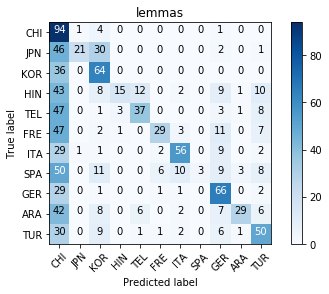


starting test for word unigram
getting feature matrices
fitting classifier to training data
done fitting, took 10.89
predicting on development data
computing f1 score for word unigram
0.507358979141

Confusion matrix, without normalization


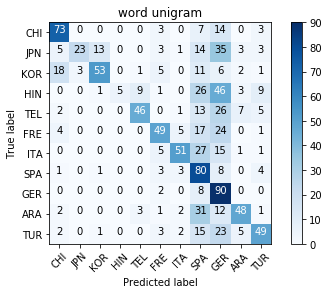


starting test for word bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 31.44
predicting on development data
computing f1 score for word bigrams
0.698765032616

Confusion matrix, without normalization


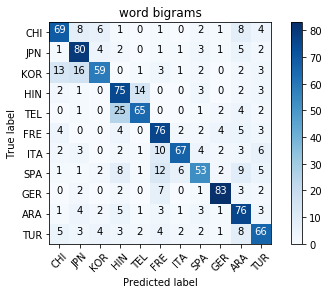


starting test for word trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 70.19
predicting on development data
computing f1 score for word trigrams
0.650486085925

Confusion matrix, without normalization


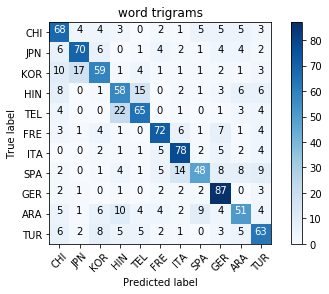


starting test for function words
getting feature matrices
fitting classifier to training data
done fitting, took 5.08
predicting on development data
computing f1 score for function words
0.315589254951

Confusion matrix, without normalization


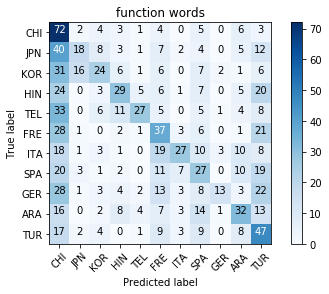


starting test for spelling errors
getting feature matrices
fitting classifier to training data
done fitting, took 0.84
predicting on development data
computing f1 score for spelling errors
0.168526576215

Confusion matrix, without normalization


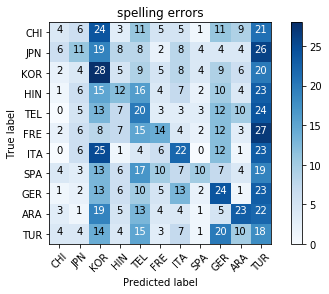


starting test for punctuation bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 3.71
predicting on development data
computing f1 score for punctuation bigrams
0.489472371914

Confusion matrix, without normalization


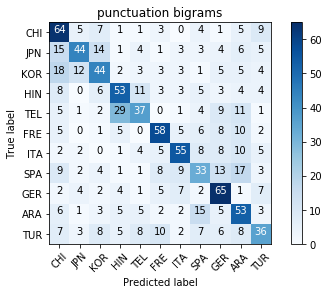


starting test for punctuation trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 4.97
predicting on development data
computing f1 score for punctuation trigrams
0.278314305133

Confusion matrix, without normalization


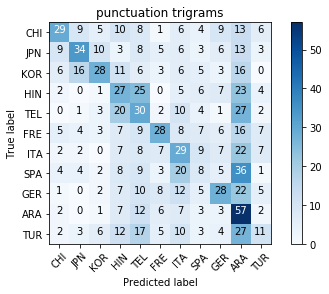


starting test for punctuation
getting feature matrices
fitting classifier to training data
done fitting, took 0.63
predicting on development data
computing f1 score for punctuation


C:\Users\sophia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0681262601184

Confusion matrix, without normalization


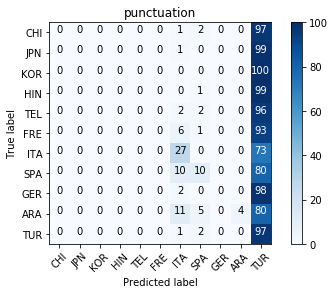


starting test for char bigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 57.65
predicting on development data
computing f1 score for char bigrams (within word)
0.379965011218

Confusion matrix, without normalization


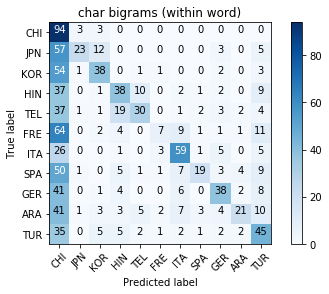


starting test for char trigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 53.78
predicting on development data
computing f1 score for char trigrams (within word)
0.50945449818

Confusion matrix, without normalization


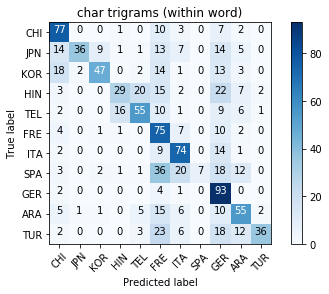


starting test for char 4-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 62.94
predicting on development data
computing f1 score for char 4-grams (within word)
0.636799996076

Confusion matrix, without normalization


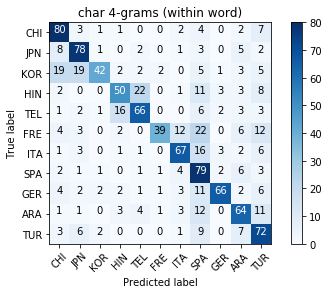


starting test for char 5-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 47.58
predicting on development data
computing f1 score for char 5-grams (within word)
0.561293196003

Confusion matrix, without normalization


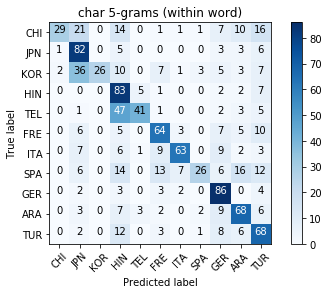


starting test for char bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 47.05
predicting on development data
computing f1 score for char bigrams
0.211357031903

Confusion matrix, without normalization


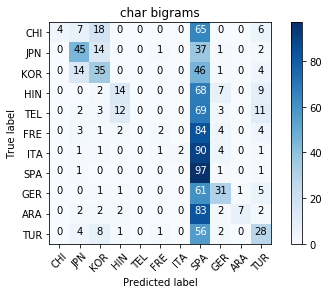


starting test for char trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 54.32
predicting on development data
computing f1 score for char trigrams
0.517784113667

Confusion matrix, without normalization


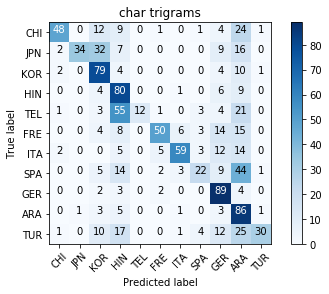


starting test for char 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 65.07
predicting on development data
computing f1 score for char 4-grams
0.580488522702

Confusion matrix, without normalization


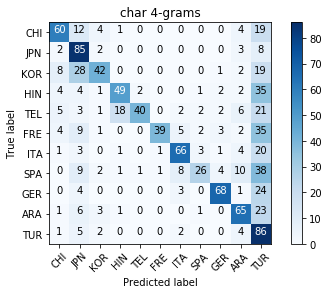


starting test for char 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 101.81
predicting on development data
computing f1 score for char 5-grams
0.687950377983

Confusion matrix, without normalization


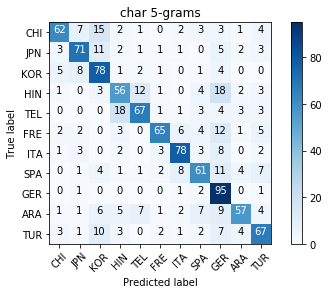


starting test for phoneme bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 63.78
predicting on development data
computing f1 score for phoneme bigrams
0.35397957013

Confusion matrix, without normalization


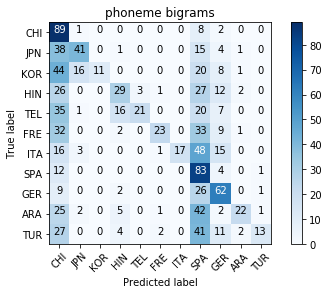


starting test for phoneme trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 68.01
predicting on development data
computing f1 score for phoneme trigrams
0.656335459986

Confusion matrix, without normalization


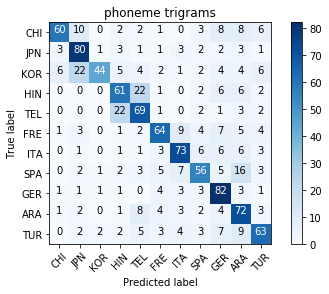


starting test for phoneme 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 93.91
predicting on development data
computing f1 score for phoneme 4-grams
0.67633944741

Confusion matrix, without normalization


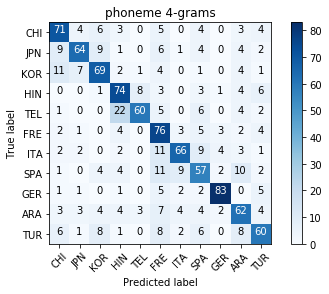


starting test for phoneme 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 137.60
predicting on development data
computing f1 score for phoneme 5-grams
0.675546879467

Confusion matrix, without normalization


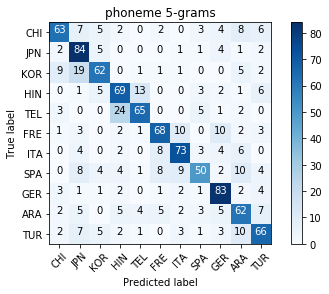


starting test for POS bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 16.79
predicting on development data
computing f1 score for POS bigrams
0.398755966889

Confusion matrix, without normalization


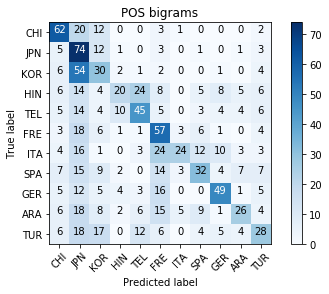


starting test for POS trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 17.80
predicting on development data
computing f1 score for POS trigrams
0.450028956831

Confusion matrix, without normalization


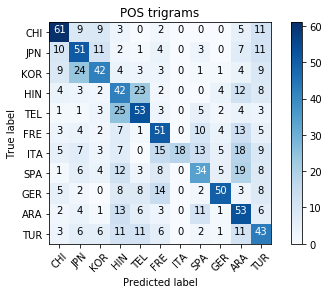

In [48]:
# SGD results

test_features(feature_list, SGD)

starting test for lemmas
getting feature matrices
fitting classifier to training data
done fitting, took 11.13
predicting on development data
computing f1 score for lemmas
0.612109333266

Confusion matrix, without normalization


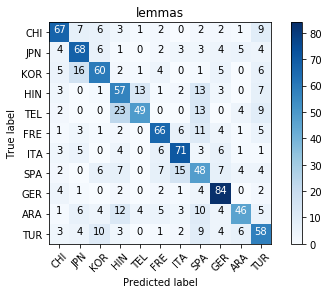


starting test for word unigram
getting feature matrices
fitting classifier to training data
done fitting, took 10.10
predicting on development data
computing f1 score for word unigram
0.646982344014

Confusion matrix, without normalization


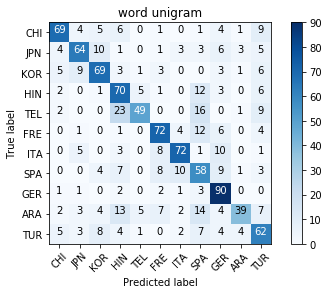


starting test for word bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 35.50
predicting on development data
computing f1 score for word bigrams
0.665787134247

Confusion matrix, without normalization


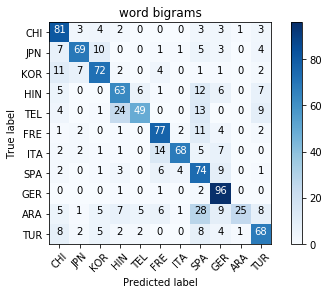


starting test for word trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 63.29
predicting on development data
computing f1 score for word trigrams
0.653017487003

Confusion matrix, without normalization


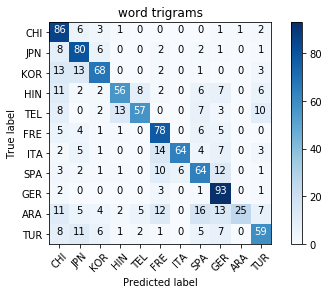


starting test for function words
getting feature matrices
fitting classifier to training data
done fitting, took 6.99
predicting on development data
computing f1 score for function words
0.365564492956

Confusion matrix, without normalization


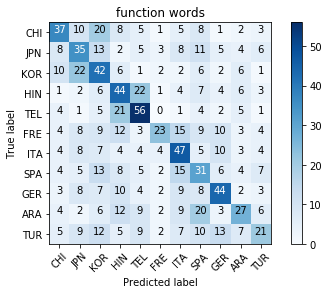


starting test for spelling errors
getting feature matrices
fitting classifier to training data
done fitting, took 0.55
predicting on development data
computing f1 score for spelling errors
0.209548427318

Confusion matrix, without normalization


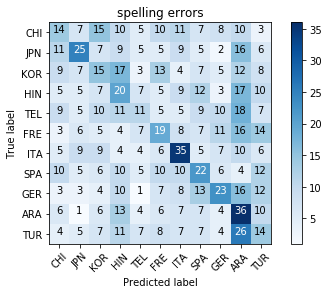


starting test for punctuation bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 4.17
predicting on development data
computing f1 score for punctuation bigrams
0.508518193554

Confusion matrix, without normalization


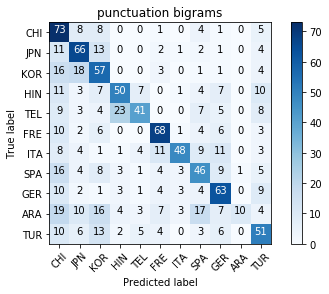


starting test for punctuation trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 5.16
predicting on development data
computing f1 score for punctuation trigrams
0.28469506628

Confusion matrix, without normalization


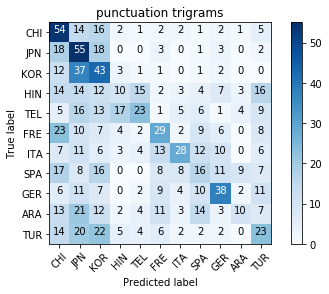


starting test for punctuation
getting feature matrices
fitting classifier to training data
done fitting, took 0.79
predicting on development data
computing f1 score for punctuation
0.207179559327

Confusion matrix, without normalization


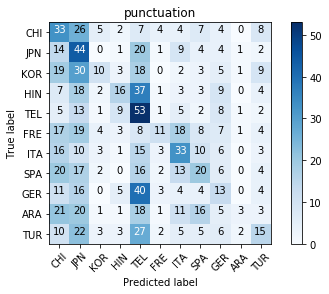


starting test for char bigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 83.52
predicting on development data
computing f1 score for char bigrams (within word)
0.368110317896

Confusion matrix, without normalization


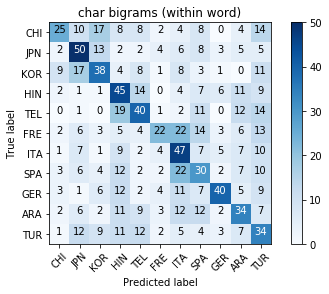


starting test for char trigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 74.03
predicting on development data
computing f1 score for char trigrams (within word)
0.495257622792

Confusion matrix, without normalization


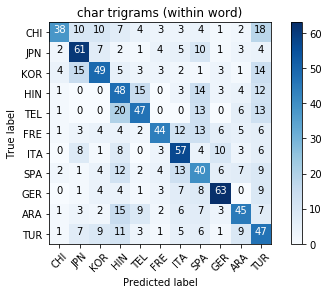


starting test for char 4-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 58.66
predicting on development data
computing f1 score for char 4-grams (within word)
0.588485803901

Confusion matrix, without normalization


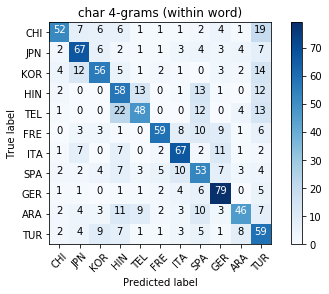


starting test for char 5-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 56.55
predicting on development data
computing f1 score for char 5-grams (within word)
0.605004601642

Confusion matrix, without normalization


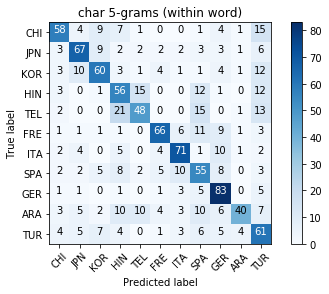


starting test for char bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 46.74
predicting on development data
computing f1 score for char bigrams
0.367643448193

Confusion matrix, without normalization


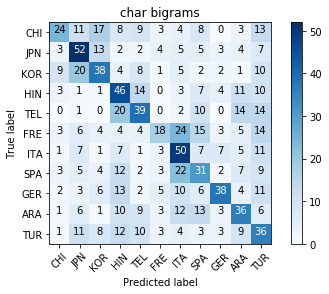


starting test for char trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 66.31
predicting on development data
computing f1 score for char trigrams
0.51944650517

Confusion matrix, without normalization


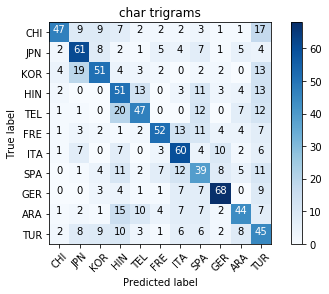


starting test for char 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 76.22
predicting on development data
computing f1 score for char 4-grams
0.611672378253

Confusion matrix, without normalization


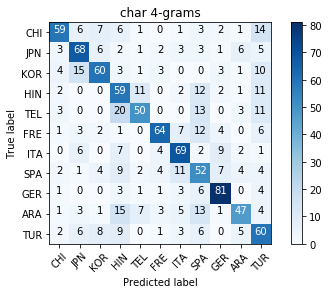


starting test for char 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 84.37
predicting on development data
computing f1 score for char 5-grams
0.651401694228

Confusion matrix, without normalization


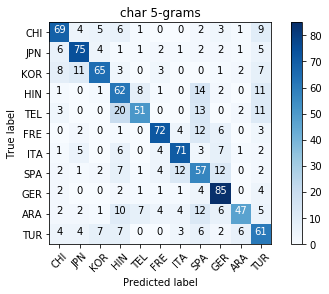


starting test for phoneme bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 55.26
predicting on development data
computing f1 score for phoneme bigrams
0.423300310582

Confusion matrix, without normalization


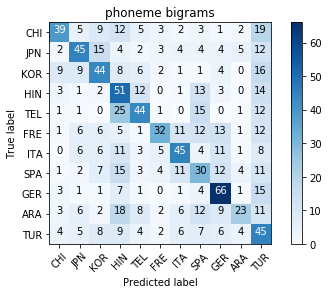


starting test for phoneme trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 67.91
predicting on development data
computing f1 score for phoneme trigrams
0.556666717865

Confusion matrix, without normalization


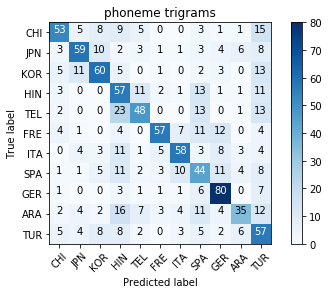


starting test for phoneme 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 114.49
predicting on development data
computing f1 score for phoneme 4-grams
0.630391502095

Confusion matrix, without normalization


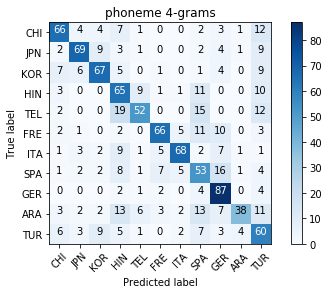


starting test for phoneme 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 127.39
predicting on development data
computing f1 score for phoneme 5-grams
0.635791605398

Confusion matrix, without normalization


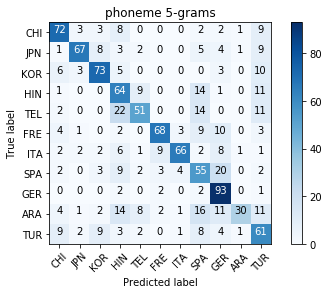


starting test for POS bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 17.97
predicting on development data
computing f1 score for POS bigrams
0.447398554911

Confusion matrix, without normalization


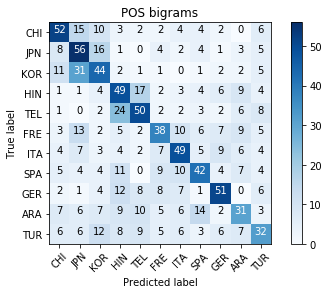


starting test for POS trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 19.17
predicting on development data
computing f1 score for POS trigrams
0.535126394076

Confusion matrix, without normalization


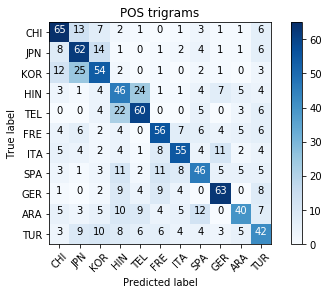

In [51]:
# Multinomial NB results
test_features(feature_list, MNB)

bernoulli_nb
starting test for lemmas
getting feature matrices
fitting classifier to training data
done fitting, took 9.59
predicting on development data
computing f1 score for lemmas
0.627002401774

Confusion matrix, without normalization


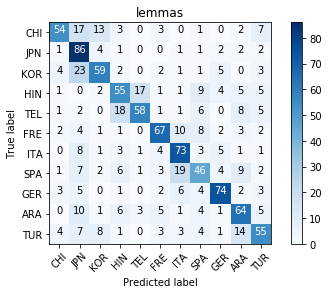


starting test for word unigram
getting feature matrices
fitting classifier to training data
done fitting, took 10.75
predicting on development data
computing f1 score for word unigram
0.635247517938

Confusion matrix, without normalization


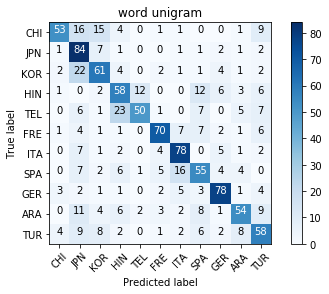


starting test for word bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 37.09
predicting on development data
computing f1 score for word bigrams
0.664339483726

Confusion matrix, without normalization


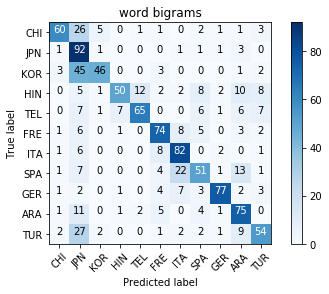


starting test for word trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 68.07
predicting on development data
computing f1 score for word trigrams
0.417614894216

Confusion matrix, without normalization


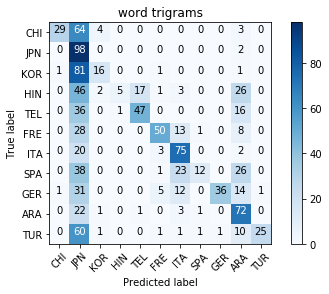


starting test for function words
getting feature matrices
fitting classifier to training data
done fitting, took 3.99
predicting on development data
computing f1 score for function words
0.37640935795

Confusion matrix, without normalization


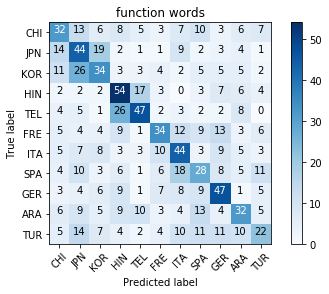


starting test for spelling errors
getting feature matrices
fitting classifier to training data
done fitting, took 0.79
predicting on development data
computing f1 score for spelling errors
0.211117545033

Confusion matrix, without normalization


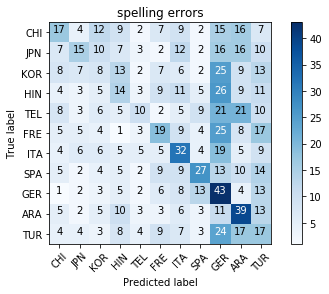


starting test for punctuation bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 2.79
predicting on development data
computing f1 score for punctuation bigrams
0.546842090562

Confusion matrix, without normalization


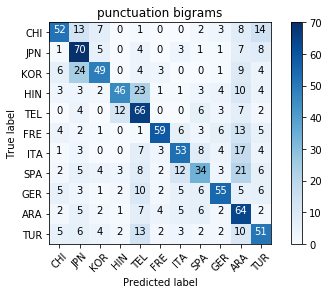


starting test for punctuation trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 3.37
predicting on development data
computing f1 score for punctuation trigrams
0.190987159118

Confusion matrix, without normalization


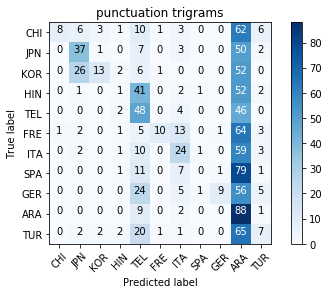


starting test for punctuation
getting feature matrices
fitting classifier to training data
done fitting, took 0.54
predicting on development data
computing f1 score for punctuation
0.157839954868

Confusion matrix, without normalization


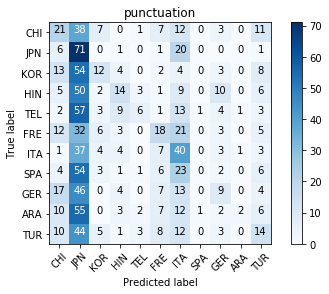


starting test for char bigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 61.75
predicting on development data
computing f1 score for char bigrams (within word)
0.354809164471

Confusion matrix, without normalization


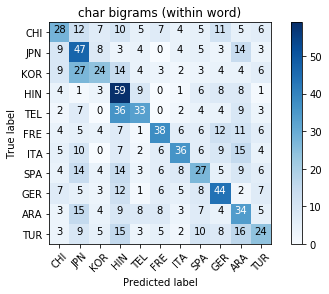


starting test for char trigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 78.15
predicting on development data
computing f1 score for char trigrams (within word)
0.489948732106

Confusion matrix, without normalization


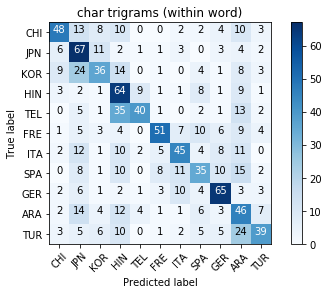


starting test for char 4-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 56.83
predicting on development data
computing f1 score for char 4-grams (within word)
0.579796705909

Confusion matrix, without normalization


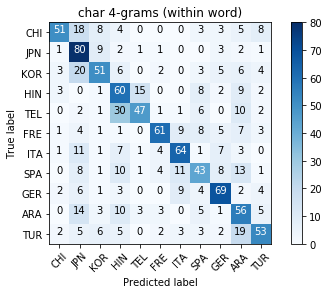


starting test for char 5-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 46.28
predicting on development data
computing f1 score for char 5-grams (within word)
0.61294339342

Confusion matrix, without normalization


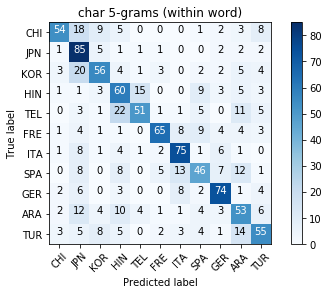


starting test for char bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 43.37
predicting on development data
computing f1 score for char bigrams
0.373282079354

Confusion matrix, without normalization


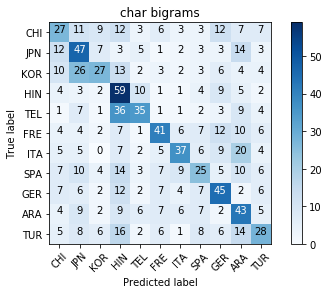


starting test for char trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 52.43
predicting on development data
computing f1 score for char trigrams
0.513701397185

Confusion matrix, without normalization


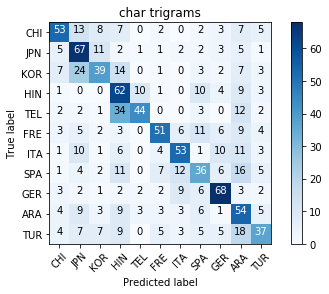


starting test for char 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 71.75
predicting on development data
computing f1 score for char 4-grams
0.61729803577

Confusion matrix, without normalization


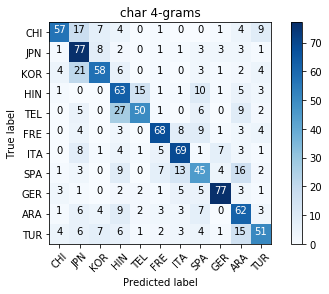


starting test for char 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 76.89
predicting on development data
computing f1 score for char 5-grams
0.664591130456

Confusion matrix, without normalization


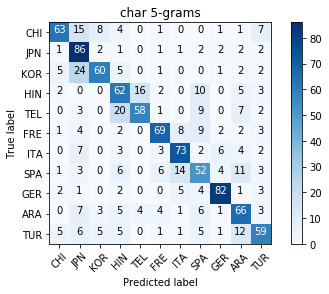


starting test for phoneme bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 57.43
predicting on development data
computing f1 score for phoneme bigrams
0.42949512382

Confusion matrix, without normalization


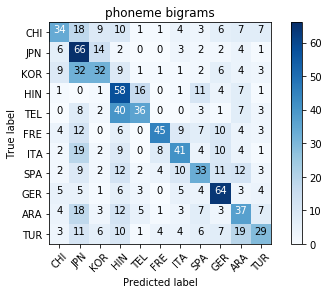


starting test for phoneme trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 22.06
predicting on development data
computing f1 score for phoneme trigrams
0.573333035448

Confusion matrix, without normalization


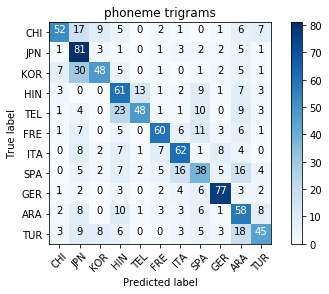


starting test for phoneme 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 27.86
predicting on development data
computing f1 score for phoneme 4-grams
0.628275429455

Confusion matrix, without normalization


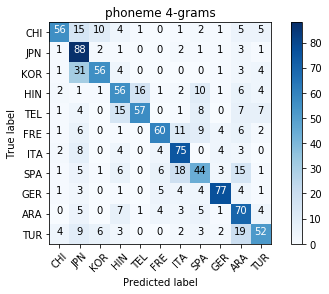


starting test for phoneme 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 41.12
predicting on development data
computing f1 score for phoneme 5-grams
0.621052563656

Confusion matrix, without normalization


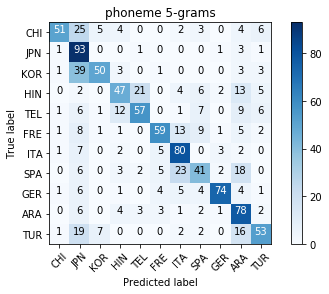


starting test for POS bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 6.34
predicting on development data
computing f1 score for POS bigrams
0.438628404666

Confusion matrix, without normalization


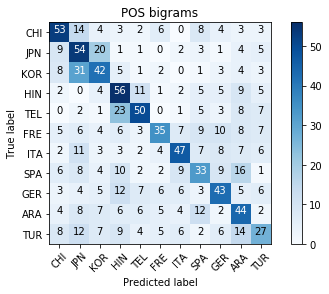


starting test for POS trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 6.50
predicting on development data
computing f1 score for POS trigrams
0.523881210905

Confusion matrix, without normalization


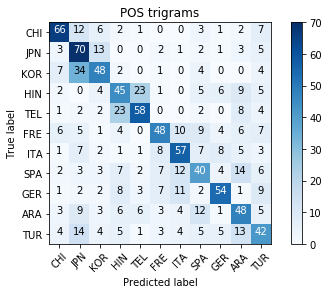

In [55]:
# Bernoulli NB results
test_features(feature_list, BNB)

perceptron
starting test for lemmas
getting feature matrices
fitting classifier to training data
done fitting, took 4.00
predicting on development data
computing f1 score for lemmas
0.481750874445

Confusion matrix, without normalization


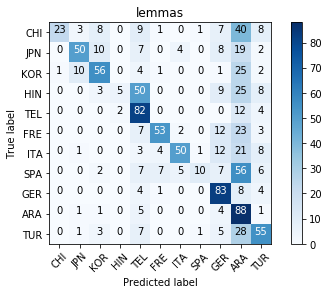


starting test for word unigram
getting feature matrices
fitting classifier to training data
done fitting, took 3.92
predicting on development data
computing f1 score for word unigram
0.478435655756

Confusion matrix, without normalization


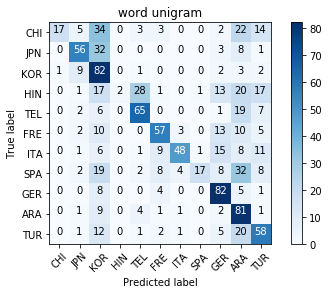


starting test for word bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 15.70
predicting on development data
computing f1 score for word bigrams
0.696110536096

Confusion matrix, without normalization


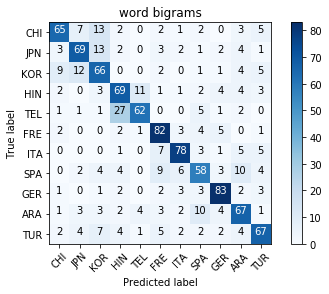


starting test for word trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 26.32
predicting on development data
computing f1 score for word trigrams
0.634001154817

Confusion matrix, without normalization


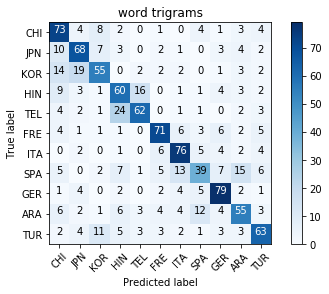


starting test for function words
getting feature matrices
fitting classifier to training data
done fitting, took 1.60
predicting on development data
computing f1 score for function words


C:\Users\sophia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.168334315055

Confusion matrix, without normalization


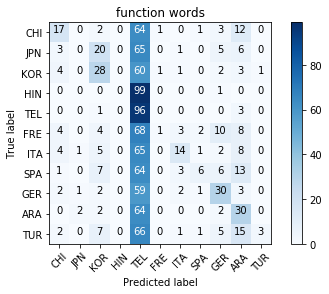


starting test for spelling errors
getting feature matrices
fitting classifier to training data
done fitting, took 0.30
predicting on development data
computing f1 score for spelling errors
0.156569019182

Confusion matrix, without normalization


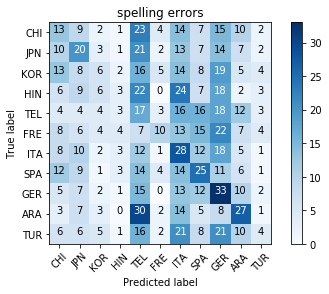


starting test for punctuation bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 1.15
predicting on development data
computing f1 score for punctuation bigrams
0.462718892902

Confusion matrix, without normalization


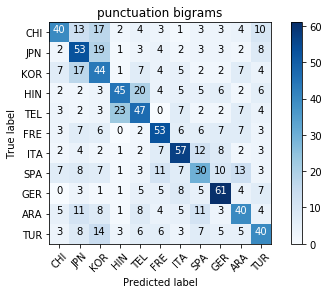


starting test for punctuation trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 1.44
predicting on development data
computing f1 score for punctuation trigrams
0.284744242625

Confusion matrix, without normalization


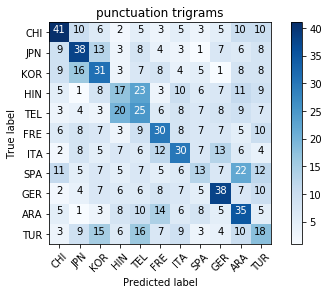


starting test for punctuation
getting feature matrices
fitting classifier to training data
done fitting, took 0.21
predicting on development data
computing f1 score for punctuation
0.0676403443954

Confusion matrix, without normalization


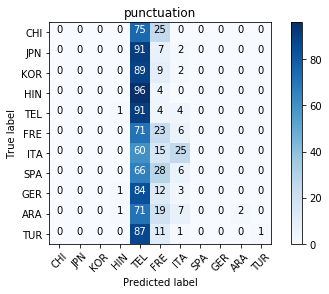


starting test for char bigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 19.11
predicting on development data
computing f1 score for char bigrams (within word)
0.298990476489

Confusion matrix, without normalization


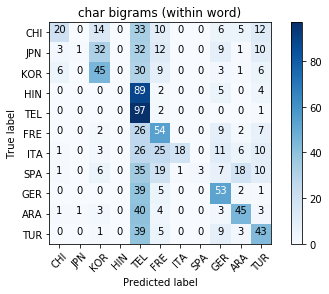


starting test for char trigrams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 19.99
predicting on development data
computing f1 score for char trigrams (within word)
0.489732917591

Confusion matrix, without normalization


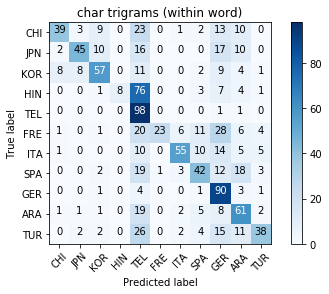


starting test for char 4-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 20.82
predicting on development data
computing f1 score for char 4-grams (within word)
0.569205188471

Confusion matrix, without normalization


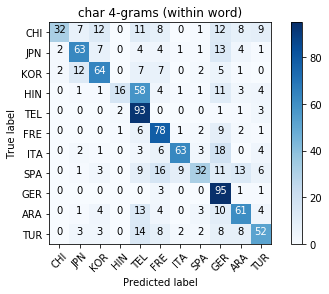


starting test for char 5-grams (within word)
getting feature matrices
fitting classifier to training data
done fitting, took 18.13
predicting on development data
computing f1 score for char 5-grams (within word)
0.611172087075

Confusion matrix, without normalization


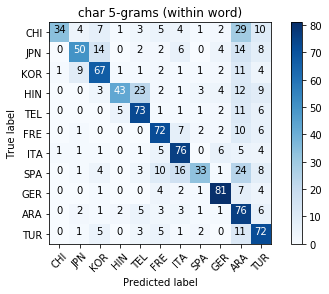


starting test for char bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 15.76
predicting on development data
computing f1 score for char bigrams
0.243156875844

Confusion matrix, without normalization


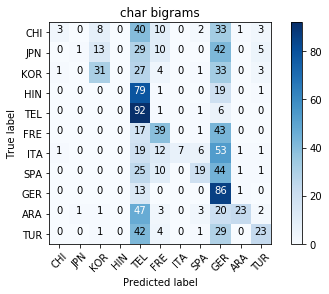


starting test for char trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 20.62
predicting on development data
computing f1 score for char trigrams
0.503560541542

Confusion matrix, without normalization


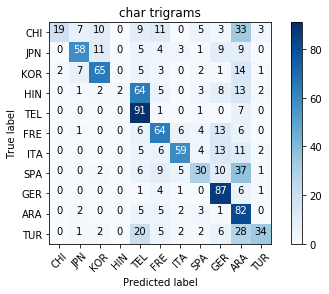


starting test for char 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 23.35
predicting on development data
computing f1 score for char 4-grams
0.660135752044

Confusion matrix, without normalization


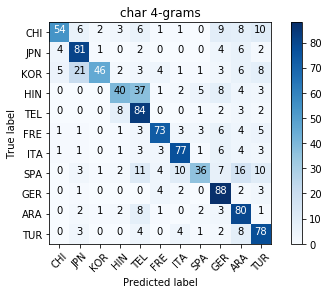


starting test for char 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 28.34
predicting on development data
computing f1 score for char 5-grams
0.654903118924

Confusion matrix, without normalization


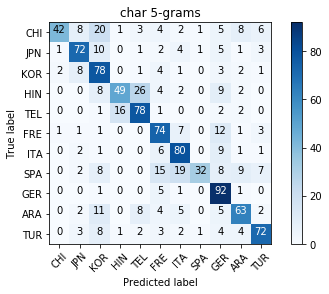


starting test for phoneme bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 18.78
predicting on development data
computing f1 score for phoneme bigrams
0.398916852601

Confusion matrix, without normalization


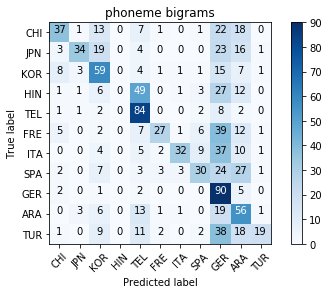


starting test for phoneme trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 21.60
predicting on development data
computing f1 score for phoneme trigrams
0.648630315067

Confusion matrix, without normalization


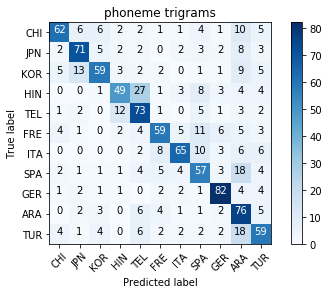


starting test for phoneme 4-grams
getting feature matrices
fitting classifier to training data
done fitting, took 27.78
predicting on development data
computing f1 score for phoneme 4-grams
0.695847382812

Confusion matrix, without normalization


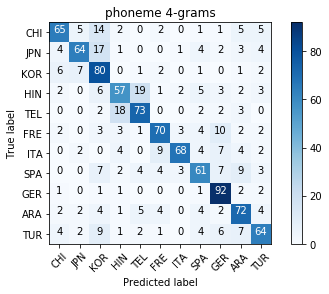


starting test for phoneme 5-grams
getting feature matrices
fitting classifier to training data
done fitting, took 43.13
predicting on development data
computing f1 score for phoneme 5-grams
0.682522533731

Confusion matrix, without normalization


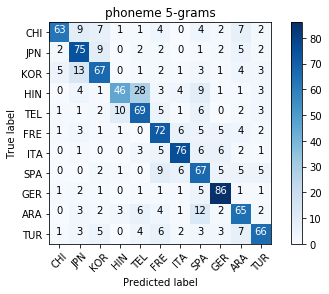


starting test for POS bigrams
getting feature matrices
fitting classifier to training data
done fitting, took 5.26
predicting on development data
computing f1 score for POS bigrams
0.312209472818

Confusion matrix, without normalization


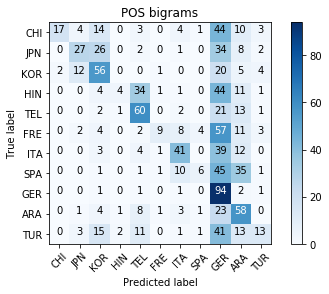


starting test for POS trigrams
getting feature matrices
fitting classifier to training data
done fitting, took 5.95
predicting on development data
computing f1 score for POS trigrams
0.429709361873

Confusion matrix, without normalization


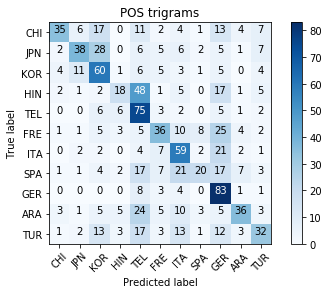

In [56]:
# Perceptron results
test_features(feature_list, PER)

linear_SVM
0.775189803735
Confusion matrix, without normalization


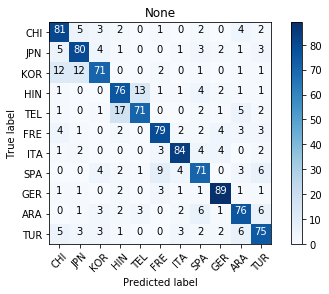

In [62]:
word_features = [
    ('lemmas', LEMMA, 1), 
    ('word unigram', ORIG, 1), 
    ('word bigrams', ORIG, 2), 
    ('word trigrams', ORIG, 3), 
    ]

test_features(word_features, SVM, combo=True)

linear_SVM
0.693110600656
Confusion matrix, without normalization


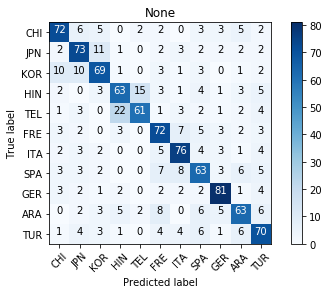

In [63]:
char_features = [
    ('char 4-grams (within word)', CHAR_WB, 4),
    ('char 5-grams (within word)', CHAR_WB, 5),
]

phone_features = [
    ('phoneme trigrams', PHONES, 3),
    ('phoneme 4-grams', PHONES, 4),
    ('phoneme 5-grams', PHONES, 5),
]

test_features(char_features, SVM, combo=True)

linear_SVM
0.705586304954
Confusion matrix, without normalization


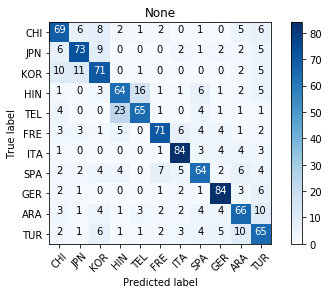

In [64]:
test_features(phone_features, SVM, combo=True)